# MNIST Autoencoder

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import input_data
%matplotlib inline

mnist=input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

Instructions for updating:
Colocations handled automatically by placer.


Now we need to create our encoder/decoder. For this, we are going to use sigmoidal functions. Sigmoidal functions delivers great results with this type of network. This is due to having a good derivative that is well-suited to backpropagation. We can create our encoder using the sigmoidal function like this:

In [3]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

Let's construct our model.
In the variable <code>cost</code> we have the loss function and in the <code>optimizer</code> variable we have our gradient used for backpropagation.

In [4]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Reconstructed Images
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Running for 20 epochs.

In [5]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

Epoch: 0001 cost= 0.196728379
Epoch: 0002 cost= 0.151983872
Epoch: 0003 cost= 0.140995041
Epoch: 0004 cost= 0.133602396
Epoch: 0005 cost= 0.128796622
Epoch: 0006 cost= 0.124917671
Epoch: 0007 cost= 0.121480331
Epoch: 0008 cost= 0.118305869
Epoch: 0009 cost= 0.116114147
Epoch: 0010 cost= 0.111163877
Epoch: 0011 cost= 0.111141264
Epoch: 0012 cost= 0.106411003
Epoch: 0013 cost= 0.107634217
Epoch: 0014 cost= 0.103918046
Epoch: 0015 cost= 0.105043672
Epoch: 0016 cost= 0.103655405
Epoch: 0017 cost= 0.104134969
Epoch: 0018 cost= 0.098660432
Epoch: 0019 cost= 0.097587034
Epoch: 0020 cost= 0.096965082
Optimization Finished!


Apply the encoder to our tests

In [6]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

Visualize our reconstructions

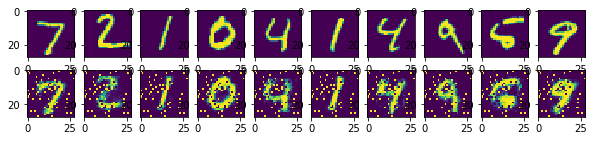

In [7]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

It reconstructed correctly but with some noise added to the image 